### [예제 5_1] 3 conv / 1 flatten
#### 3 x 3 x 32,  3 x 3 x 64,  3 x 3 x 128

In [1]:
# colab 에서 tensorflow 1.x 실행
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
from datetime import datetime      # datetime.now() 를 이용하여 학습 경과 시간 측정

# read_data_sets() 를 통해 데이터를 객체형태로 받아오고
# one_hot 옵션을 통해 정답(label) 을 one-hot 인코딩된 형태로 받아옴

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# mnist 데이터 셋은 train, test, validation 3개의 데이터 셋으로 구성되어 있으며.
# num_examples 값을 통해 데이터의 갯수 확인 가능함

print("\n", mnist.train.num_examples, mnist.test.num_examples, mnist.validation.num_examples)

# 데이터는 784(28x28)개의 픽셀을 가지는 이미지와
# 10(0~9)개 클래스를 가지는 one-hot 인코딩된 레이블(정답)을 가지고 있음

print("\ntrain image shape = ", np.shape(mnist.train.images))
print("train label shape = ", np.shape(mnist.train.labels))
print("test image shape = ", np.shape(mnist.test.images))
print("test label shape = ", np.shape(mnist.test.labels))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [0]:
# Hyper-Parameter
learning_rate = 0.001  # 학습율
epochs = 50            # 반복횟수
batch_size = 100      # 한번에 입력으로 주어지는 MNIST 개수

In [0]:
# 입력과 정답을 위한 플레이스홀더 정의
X = tf.placeholder(tf.float32, [None, 784])  

T = tf.placeholder(tf.float32, [None, 10])  

# 입력층의 출력 값. 컨볼루션 연산을 위해 reshape 시킴
A1 = X_img = tf.reshape(X, [-1, 28, 28, 1])   # image 28 X 28 X 1 (black/white)

In [0]:
# 1번째 컨볼루션 층
# 3X3 크기를 가지는 32개의 필터를 적용

F2 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))  
#b2 = tf.Variable(tf.random_normal([32]))   
b2 = tf.Variable(tf.constant(0.1, shape=[32]))  

# 1번째 컨볼루션 연산을 통해 28 X 28 X1  => 28 X 28 X 32 
C2 = tf.nn.conv2d(A1, F2, strides=[1, 1, 1, 1], padding='SAME')

# relu
Z2 = tf.nn.relu(C2+b2)

# 1번째 max pooling을 통해 28 X 28 X 32  => 14 X 14 X 32 
A2 = P2 = tf.nn.max_pool(Z2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [0]:
# 2번째 컨볼루션 층
F3 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))  
#b3 = tf.Variable(tf.random_normal([64]))   
b3 = tf.Variable(tf.constant(0.1, shape=[64]))  

# 2번째 컨볼루션 연산을 통해 14 X 14 X 32 => 14 X 14 X 64 
C3 = tf.nn.conv2d(A2, F3, strides=[1, 1, 1, 1], padding='SAME')

# relu
Z3 = tf.nn.relu(C3+b3)

# 2번째 max pooling을 통해 14 X 14 X 64 => 7 X 7 X 64
A3 = P3 = tf.nn.max_pool(Z3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [0]:
# 3번째 컨볼루션 층
F4 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))  
#b4 = tf.Variable(tf.random_normal([128]))   
b4 = tf.Variable(tf.constant(0.1, shape=[128]))  

# 3번째 컨볼루션 연산을 통해 7 X 7 X 64 => 7 X 7 X 128
C4 = tf.nn.conv2d(A3, F4, strides=[1, 1, 1, 1], padding='SAME')

# relu
Z4 = tf.nn.relu(C4+b4)

# 3번째 max pooling을 통해 7 X 7 X 128 => 4 X 4 X 128
A4 = P4 = tf.nn.max_pool(Z4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [0]:
# 4X4 크기를 가진 128개의 activation map을 flatten 시킴
A4_flat = P4_flat = tf.reshape(A4, [-1, 128*4*4])

In [0]:
# 출력층
W5 = tf.Variable(tf.random_normal([128*4*4, 10], stddev=0.01))
b5 = tf.Variable(tf.random_normal([10]))

# 출력층 선형회귀  값 Z5, 즉 softmax 에 들어가는 입력 값
Z5 = logits = tf.matmul(A4_flat, W5) + b5    # 선형회귀 값 Z5

y = A5 = tf.nn.softmax(Z5)

In [0]:
loss = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits_v2(logits=Z5, labels=T) )

optimizer = tf.train.AdamOptimizer(learning_rate)

train = optimizer.minimize(loss)  

In [0]:
# batch_size X 10 데이터에 대해 argmax를 통해 행단위로 비교함
predicted_val = tf.equal( tf.argmax(A5, 1), tf.argmax(T, 1) )

# batch_size X 10 의 True, False 를 1 또는 0 으로 변환
accuracy = tf.reduce_mean(tf.cast(predicted_val, dtype=tf.float32))

# index list 출력
accuracy_index = tf.cast(predicted_val, dtype=tf.float32)

# 예측값 처리
predicted_list = tf.argmax(A5, 1)

In [12]:
index_label_prediction_list = []

with  tf.Session()  as sess:
    
    sess.run(tf.global_variables_initializer())  # 변수 노드(tf.Variable) 초기화
    
    start_time = datetime.now()
    
    for i in range(epochs):    # 30 번 반복수행
        
        total_batch = int(mnist.train.num_examples / batch_size)  # 55,000 / 100

        for step in range(total_batch):
            
            batch_x_data, batch_t_data = mnist.train.next_batch(batch_size)
      
            loss_val, _ = sess.run([loss, train], feed_dict={X: batch_x_data, T: batch_t_data})    
        
            if step % 100 == 0:
                print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)             
    
    end_time = datetime.now() 
    
    print("\nelapsed time = ", end_time - start_time) 
    
    # Accuracy 확인
    test_x_data = mnist.test.images    # 10000 X 784
    test_t_data = mnist.test.labels    # 10000 X 10
    
    accuracy_val, predicted_list_val, index_label = sess.run([accuracy, predicted_list, accuracy_index], feed_dict={X: test_x_data, T: test_t_data})
    
    print("\nAccuracy = ", accuracy_val)
    print("type(accuracy_val) = ", type(accuracy_val), ', type(predicted_list_val) = ', type(predicted_list_val), ', type(index_label) = ', type(index_label))
    print("index_label.shape = ", index_label.shape)
    
    index_label_list = list(index_label)
    print("length of index_label_list = ", len(index_label_list))
    print("false label count = ", index_label_list.count([0]))
        
    temp_list = [] 
    
    for index in range(len(index_label)):
        
        if index_label[index] == 0:
            
            temp_list.append(index)
            temp_list.append(np.argmax(test_t_data[index]))  # one-hot encoding 이므로 argmax 로 정답 추출
            temp_list.append(predicted_list_val[index])
            
            index_label_prediction_list.append(temp_list)
            
            temp_list = []
            
    print("\nlength of index_label_false_list", len(index_label_prediction_list))

epochs =  0 , step =  0 , loss_val =  2.7331676
epochs =  0 , step =  100 , loss_val =  1.7306676
epochs =  0 , step =  200 , loss_val =  0.35471573
epochs =  0 , step =  300 , loss_val =  0.2106719
epochs =  0 , step =  400 , loss_val =  0.10681215
epochs =  0 , step =  500 , loss_val =  0.020440197
epochs =  1 , step =  0 , loss_val =  0.06276152
epochs =  1 , step =  100 , loss_val =  0.035776757
epochs =  1 , step =  200 , loss_val =  0.057375416
epochs =  1 , step =  300 , loss_val =  0.12569164
epochs =  1 , step =  400 , loss_val =  0.01692431
epochs =  1 , step =  500 , loss_val =  0.040316906
epochs =  2 , step =  0 , loss_val =  0.03216313
epochs =  2 , step =  100 , loss_val =  0.07538155
epochs =  2 , step =  200 , loss_val =  0.031711895
epochs =  2 , step =  300 , loss_val =  0.035866477
epochs =  2 , step =  400 , loss_val =  0.03772566
epochs =  2 , step =  500 , loss_val =  0.07590705
epochs =  3 , step =  0 , loss_val =  0.02327886
epochs =  3 , step =  100 , loss_val

In [13]:
print(index_label_prediction_list)

[[247, 4, 2], [321, 2, 7], [340, 5, 3], [449, 3, 5], [646, 2, 4], [947, 8, 9], [1014, 6, 5], [1039, 7, 3], [1182, 6, 5], [1224, 2, 4], [1226, 7, 2], [1232, 9, 4], [1319, 8, 0], [1527, 1, 5], [1530, 8, 7], [1901, 9, 4], [2130, 4, 9], [2135, 6, 1], [2182, 1, 3], [2414, 9, 4], [2447, 4, 9], [2597, 5, 3], [2654, 6, 1], [2896, 8, 0], [2927, 3, 2], [2939, 9, 5], [2953, 3, 5], [3073, 1, 2], [3422, 6, 0], [3520, 6, 4], [3558, 5, 0], [3727, 8, 9], [3808, 7, 8], [3906, 1, 3], [3941, 4, 6], [4078, 9, 8], [4176, 2, 7], [4201, 1, 7], [4238, 7, 3], [4360, 5, 3], [4369, 9, 4], [4497, 8, 7], [4571, 6, 8], [4699, 6, 1], [4740, 3, 5], [4823, 9, 4], [4860, 4, 9], [5654, 7, 2], [5906, 7, 9], [5937, 5, 3], [5955, 3, 8], [5997, 5, 9], [6555, 8, 9], [6571, 9, 7], [6576, 7, 1], [6597, 0, 7], [6625, 8, 2], [6651, 0, 8], [6783, 1, 6], [8246, 3, 5], [8287, 6, 2], [8326, 6, 4], [8527, 4, 9], [9664, 2, 7], [9679, 6, 1], [9692, 9, 7], [9729, 5, 6]]


len of index_label_prediction_list =>  67 , false_data_index =>  4


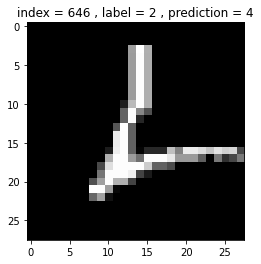

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

false_data_index = np.random.randint(len(index_label_prediction_list))

print('len of index_label_prediction_list => ', len(index_label_prediction_list), ', false_data_index => ', false_data_index)

mnist_index = index_label_prediction_list[false_data_index][0]
label = index_label_prediction_list[false_data_index][1]
prediction = index_label_prediction_list[false_data_index][2]

title_str = 'index = ' + str(mnist_index) + ' , label = ' + str(label) + ' , prediction = ' + str(prediction)

img = test_x_data[mnist_index].reshape(28,28)


plt.title(title_str)
plt.imshow(img, cmap='gray')
plt.show()